In [6]:
!pip install pandas numpy matplotlib seaborn scipy

ERROR: Could not find a version that satisfies the requirement install (from versions: none)
ERROR: No matching distribution found for install


In [5]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Data cleaning

In [3]:
# defining the file paths for the datasets
customers = "C:/Users/Marcus/Documents/NYP/NYPY3/Y3S1/EGT309 AI Solution Development/data/olist_customers_dataset.csv"
geolocation = "C:/Users/Marcus/Documents/NYP/NYPY3/Y3S1/EGT309 AI Solution Development/data/olist_geolocation_dataset.csv"
order_items = "C:/Users/Marcus/Documents/NYP/NYPY3/Y3S1/EGT309 AI Solution Development/data/olist_order_items_dataset.csv"
order_payments = "C:/Users/Marcus/Documents/NYP/NYPY3/Y3S1/EGT309 AI Solution Development/data/olist_order_payments_dataset.csv"
order_reviews = "C:/Users/Marcus/Documents/NYP/NYPY3/Y3S1/EGT309 AI Solution Development/data/olist_order_reviews_dataset.csv"
orders = "C:/Users/Marcus/Documents/NYP/NYPY3/Y3S1/EGT309 AI Solution Development/data/olist_orders_dataset.csv"
products = "C:/Users/Marcus/Documents/NYP/NYPY3/Y3S1/EGT309 AI Solution Development/data/olist_products_dataset.csv"
sellers = "C:/Users/Marcus/Documents/NYP/NYPY3/Y3S1/EGT309 AI Solution Development/data/olist_sellers_dataset.csv"
product_category_name_translation = "C:/Users/Marcus/Documents/NYP/NYPY3/Y3S1/EGT309 AI Solution Development/data/product_category_name_translation.csv"

In [9]:
# # defining the file paths for the datasets
# customers = "X:/data/olist_customers_dataset.csv"
# geolocation = "X:/data/olist_geolocation_dataset.csv"
# order_items = "X:/data/olist_order_items_dataset.csv"
# order_payments = "X:/data/olist_order_payments_dataset.csv"
# order_reviews = "X:/data/olist_order_reviews_dataset.csv"
# orders = "X:/data/olist_orders_dataset.csv"
# products = "X:/data/olist_products_dataset.csv"
# sellers = "X:/data/olist_sellers_dataset.csv"
# product_category_name_translation = "X:/data/product_category_name_translation.csv"

In [7]:
# reading the datasets into pandas DataFrames
customers_df = pd.read_csv(customers)
geolocation_df = pd.read_csv(geolocation)
order_items_df = pd.read_csv(order_items)
order_payments_df = pd.read_csv(order_payments)
# order_reviews_df = pd.read_csv(order_reviews)
# order_reviews_df = pd.read_csv("X:/data/olist_order_reviews_dataset.csv", 
#                  encoding='utf-8', 
#                  on_bad_lines='skip',
#                  engine='python')
order_reviews_df = pd.read_csv("C:/Users/Marcus/Documents/NYP/NYPY3/Y3S1/EGT309 AI Solution Development/data/olist_order_reviews_dataset.csv", 
                 encoding='utf-8', 
                 on_bad_lines='skip',
                 engine='python')
orders_df = pd.read_csv(orders)
products_df = pd.read_csv(products)
sellers_df = pd.read_csv(sellers)
product_category_name_translation_df = pd.read_csv(product_category_name_translation)

In [8]:
# defining functions to clean and preprocess the data
def checkingforduplinull(df, name="DataFrame"):
    print(f"Checking for duplicates and null values in `{name}`...")
    print(f"Duplicates: {df.duplicated().sum()}")
    print(f"Null values: {df.isnull().sum().sum()}")
    print("\n")

In [9]:
dataset = {
    'customers_df': customers_df,
    'geolocation_df': geolocation_df,
    'order_items_df': order_items_df,
    'order_payments_df': order_payments_df,
    'order_reviews_df': order_reviews_df,
    'orders_df': orders_df,
    'products_df': products_df,
    'sellers_df': sellers_df,
    'product_category_name_translation_df': product_category_name_translation_df
}

In [10]:
#checking for duplicates and null values in each DataFrame
checkingforduplinull(customers_df, "customers_df")
checkingforduplinull(geolocation_df, "geolocation_df")
checkingforduplinull(order_items_df, "order_items_df")
checkingforduplinull(order_payments_df, "order_payments_df")
checkingforduplinull(order_reviews_df, "order_reviews_df")
checkingforduplinull(orders_df, "orders_df")
checkingforduplinull(products_df, "products_df")
checkingforduplinull(sellers_df, "sellers_df")
checkingforduplinull(product_category_name_translation_df, "product_category_name_translation_df")

Checking for duplicates and null values in `customers_df`...
Duplicates: 0
Null values: 0


Checking for duplicates and null values in `geolocation_df`...
Duplicates: 261831
Null values: 0


Checking for duplicates and null values in `order_items_df`...
Duplicates: 0
Null values: 0


Checking for duplicates and null values in `order_payments_df`...
Duplicates: 0
Null values: 0


Checking for duplicates and null values in `order_reviews_df`...
Duplicates: 0
Null values: 145903


Checking for duplicates and null values in `orders_df`...
Duplicates: 0
Null values: 4908


Checking for duplicates and null values in `products_df`...
Duplicates: 0
Null values: 2448


Checking for duplicates and null values in `sellers_df`...
Duplicates: 0
Null values: 0


Checking for duplicates and null values in `product_category_name_translation_df`...
Duplicates: 0
Null values: 0




## Geolocation_df

In [11]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


duplicates are normal as one place can have multiple orders.

In [12]:
# finding which column null values appear in the order_reviews DataFrame
order_reviews_df.isnull().sum()


review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [13]:
# order_reviews_df dataset
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


we will also leave order_reviews_df alone as review comment titles and message are not crucial.

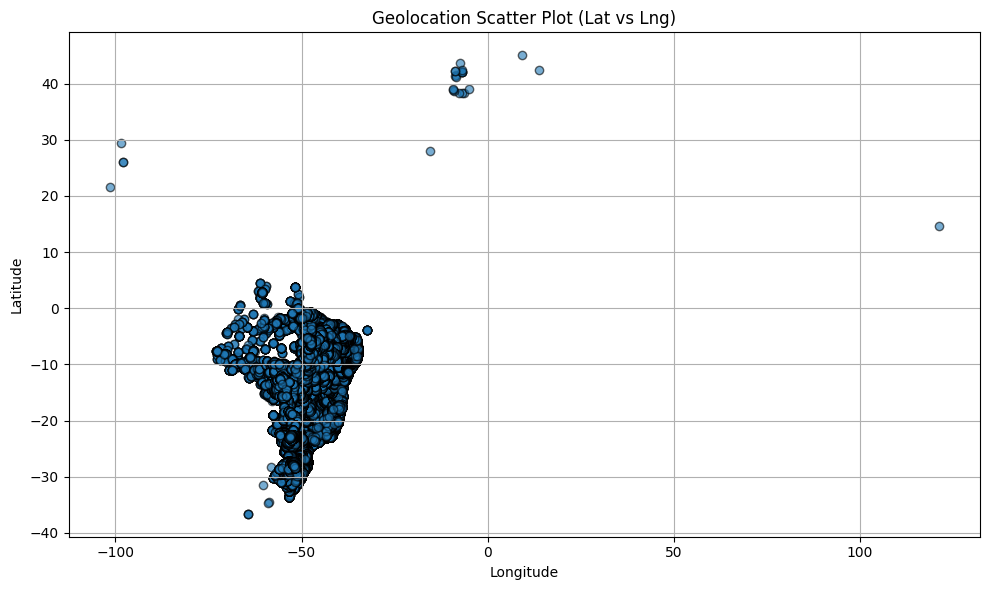

In [14]:
# plotting lat against lng from geolocation_df
plt.figure(figsize=(10, 6))
plt.scatter(geolocation_df["geolocation_lng"], geolocation_df["geolocation_lat"], alpha=0.6, edgecolors='k')
plt.title("Geolocation Scatter Plot (Lat vs Lng)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()

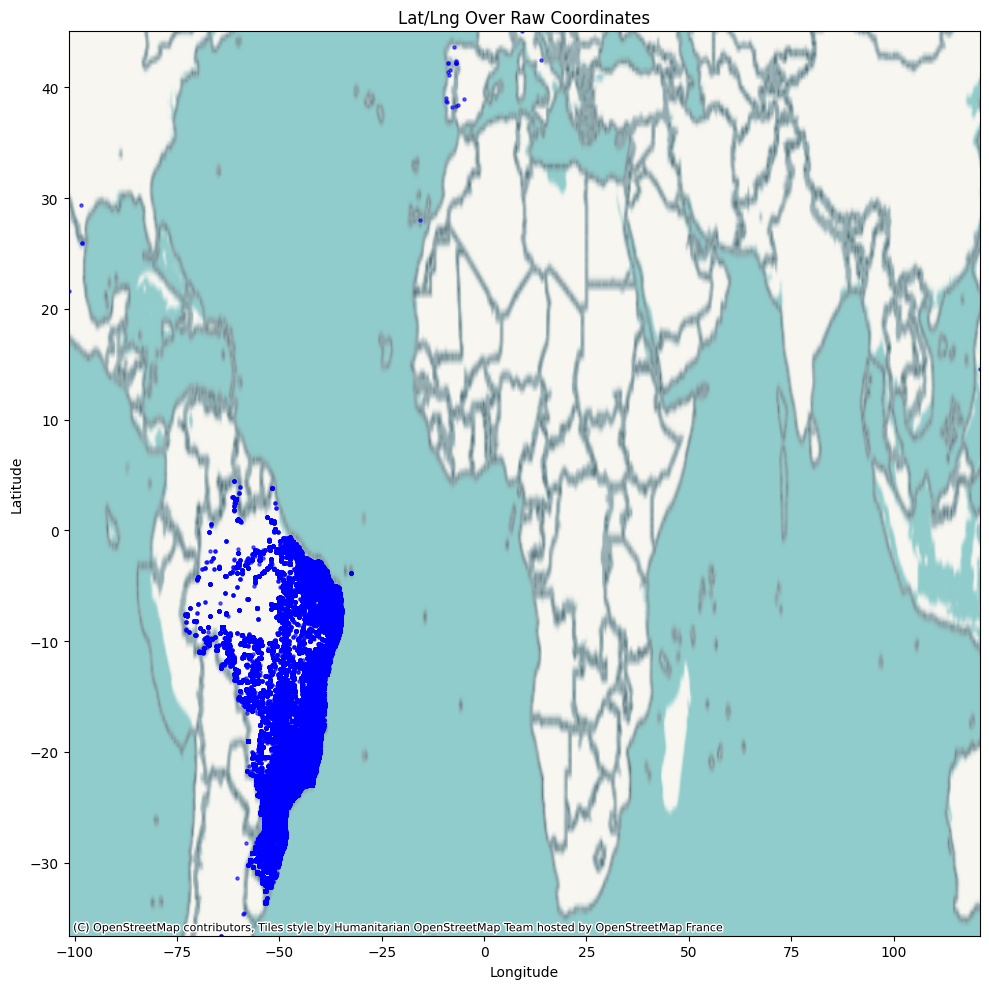

In [15]:
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd

# Create a blank plot with lat/lng
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(geolocation_df["geolocation_lng"], geolocation_df["geolocation_lat"],
           s=5, color='blue', alpha=0.6)

# Set correct bounds for map tiles
ax.set_xlim(geolocation_df["geolocation_lng"].min(), geolocation_df["geolocation_lng"].max())
ax.set_ylim(geolocation_df["geolocation_lat"].min(), geolocation_df["geolocation_lat"].max())

# Try to overlay map (may not align perfectly without reprojecting)
try:
    ctx.add_basemap(ax, crs='EPSG:4326')  # using raw lat/lng coords
except Exception as e:
    print("Map overlay failed:", e)

ax.set_title("Lat/Lng Over Raw Coordinates")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()

In [16]:
# Calculate z-scores for latitude and longitude
geolocation_df["lat_z"] = zscore(geolocation_df["geolocation_lat"])
geolocation_df["lng_z"] = zscore(geolocation_df["geolocation_lng"])

# Set a threshold (e.g. 3 standard deviations from the mean)
threshold = 10

# Identify rows where either lat or lng z-score is above the threshold
outliers = geolocation_df[(geolocation_df["lat_z"].abs() > threshold) | (geolocation_df["lng_z"].abs() > threshold)]

# Drop the z-score columns if not needed
geolocation_df.drop(columns=["lat_z", "lng_z"], inplace=True)

# Display the outliers
outliers.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,lat_z,lng_z
513631,28165,41.614052,-8.411675,vila nova de campos,RJ,10.985253,8.894877
513754,28155,42.439286,13.820214,santa maria,RJ,11.129629,14.101718
514429,28333,38.381672,-6.328200,raposo,RJ,10.419742,9.382839
516682,28595,43.684961,-7.411080,portela,RJ,11.347562,9.129222
538512,29654,29.409252,-98.484121,santo antônio do canaã,ES,8.850002,-12.200627


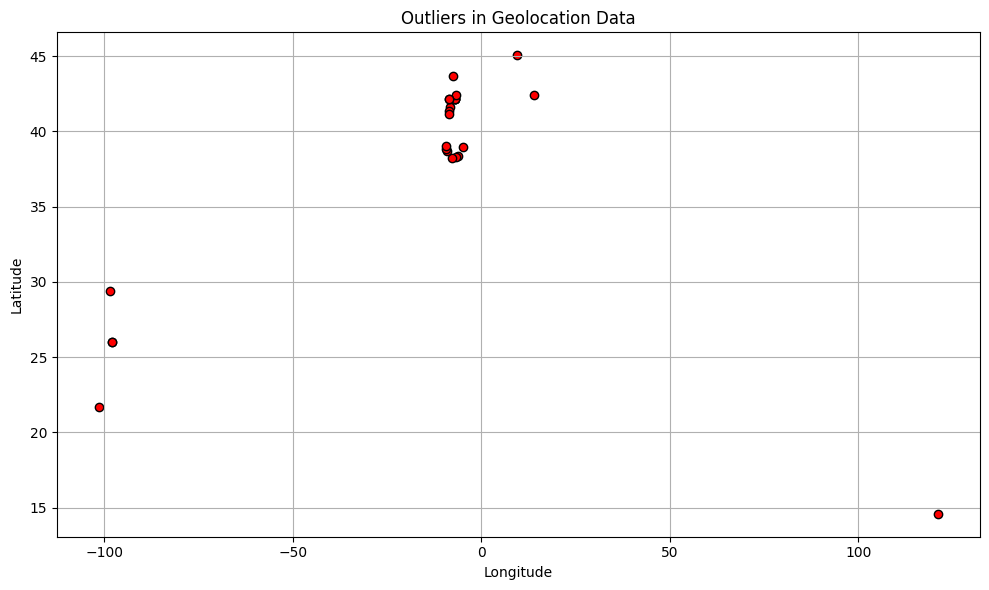

In [17]:
# plot outliers in geolocation data for visualization
plt.figure(figsize=(10, 6))
plt.scatter(outliers["geolocation_lng"], outliers["geolocation_lat"], color='red', edgecolors='k')
plt.title("Outliers in Geolocation Data")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()


In [18]:
# removing outliers from the geolocation DataFrame
geolocation_df = geolocation_df.drop(outliers.index)


## Orders_df

In [19]:
# finding the number of null values in each column of the orders DataFrame
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [20]:
# rows that do not have "delivered" in the order_status column
non_delivered = orders_df[orders_df['order_status'] != 'delivered']
non_delivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00


In [21]:
# unfilled/null rows even with "delivered" status
delivered_with_nulls = orders_df[
    (orders_df['order_status'] == 'delivered') &
    (orders_df.isnull().any(axis=1))
]

delivered_with_nulls.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaN,2017-12-18 00:00:00
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaN,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17 00:00:00
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaN,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaN,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17 00:00:00
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaN,2018-07-16 00:00:00


In [22]:
# Dropping unfilled rows even with "delivered" status
orders_df = orders_df.drop(delivered_with_nulls.index)


In [23]:
# checking for unfilled/null rows even with "delivered" status again
delivered_with_nulls_again = orders_df[
    (orders_df['order_status'] == 'delivered') &
    (orders_df.isnull().any(axis=1))
]

delivered_with_nulls_again

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


the other null values in "orders_df" are normal due to their respective "order_status"

## products_df

In [24]:
# checking for null values in the products DataFrame columns
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [25]:
# checking for null values in the products DataFrame
empty_product_name = products_df[products_df['product_category_name'].isnull()]
empty_product_name.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0


In [26]:
# finding the 2 outliers, 2 null values in product_weight_g, product_length_cm, product_height_cm and product_width_cm
empty = products_df[products_df['product_weight_g'].isnull()]
empty

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


should remove product_id = 5eb564652db742ff8f28759cd8d2652a, as everything is empty.

In [27]:
#defining removing product_id = 5eb564652db742ff8f28759cd8d2652a
def remove_product_id_5eb564652db742ff8f28759cd8d2652a(df):
    # removing the row with product_id = 5eb564652db742ff8f28759cd8d2652a
    df = df[df['product_id'] != '5eb564652db742ff8f28759cd8d2652a']
    return df

In [28]:
# #removing the row with product_id = 5eb564652db742ff8f28759cd8d2652a
# products_df = remove_product_id_5eb564652db742ff8f28759cd8d2652a(products_df)
# order_items_df = remove_product_id_5eb564652db742ff8f28759cd8d2652a(order_items_df)



## Order_payments_df

Merging rows of same order_id into 1.

In [29]:
# merging rows by order_id, combining payment types, installments, and values
order_payments_df = order_payments_df.groupby('order_id').agg({
    'payment_type': lambda x: ','.join(sorted(set(x))),
    'payment_installments': 'sum',
    'payment_value': 'sum'
}).reset_index()


In [30]:
# Example
order_payments_df[order_payments_df['order_id'] == '5cfd514482e22bc992e7693f0e3e8df7']

,order_id,payment_type,payment_installments,payment_value
36023,5cfd514482e22bc992e7693f0e3e8df7,"credit_card,voucher",5,710.58


# Exporting the cleaned datasets

In [31]:
# Export cleaned dataframes to the cleaned_data directory
customers_df.to_csv('cleaned_data/cleaned_customers.csv', index=False)
geolocation_df.to_csv('cleaned_data/cleaned_geolocation.csv', index=False)
order_items_df.to_csv('cleaned_data/cleaned_order_items.csv', index=False)
order_payments_df.to_csv('cleaned_data/cleaned_order_payments.csv', index=False)
order_reviews_df.to_csv('cleaned_data/cleaned_order_reviews.csv', index=False)
orders_df.to_csv('cleaned_data/cleaned_orders.csv', index=False)
products_df.to_csv('cleaned_data/cleaned_products.csv', index=False)
sellers_df.to_csv('cleaned_data/cleaned_sellers.csv', index=False)
product_category_name_translation_df.to_csv('cleaned_data/cleaned_product_category_name_translation.csv', index=False)


OSError: Cannot save file into a non-existent directory: 'cleaned_data'

# Merge Section (id needed)

To merge the datasets, IDs need to be unique.
Merging data and Adding New columns:

In [32]:
customers_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [33]:
customers_df_returningcustomer=customers_df.copy()
customers_df_returningcustomer

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [34]:
customers_df_returningcustomer.columns = (
    customers_df_returningcustomer.columns
    .str.strip()        # remove leading/trailing spaces
    .str.strip('"')     # remove extra quotes
    .str.lower()        # lowercase everything (optional but safe)
)

In [35]:
orders_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [36]:
customer_orders_df = pd.merge(customers_df_returningcustomer, orders_df, on='customer_id', how="inner")
customer_orders_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
99413,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00
99414,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00
99415,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00
99416,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00


In [37]:
# Step 1: Mark whether the row is a voucher
order_payments_df['is_voucher'] = order_payments_df['payment_type'] == 'voucher'

# Step 2: Count how many vouchers were used per order_id
voucher_counts = order_payments_df[order_payments_df['is_voucher']].groupby('order_id').size().reset_index(name='voucher_count')

# Step 3: Aggregate total payment and whether any voucher was used
orderpaymentmerge = order_payments_df.groupby('order_id').agg({
    'payment_value': 'sum',       # Total payment for the order
    'is_voucher': 'any'           # Whether any voucher was used in the order
}).reset_index()

# Step 4: Rename columns for clarity
orderpaymentmerge.rename(columns={
    'payment_value': 'total_payment',
    'is_voucher': 'voucher_used'
}, inplace=True)

# Step 5: Merge in voucher counts
orderpaymentmerge = pd.merge(orderpaymentmerge, voucher_counts, on='order_id', how='left')
orderpaymentmerge['voucher_count'] = orderpaymentmerge['voucher_count'].fillna(0).astype(int)

# Display result

In [38]:
orderpaymentmerge

,order_id,total_payment,voucher_used,voucher_count
0,00010242fe8c5a6d1ba2dd792cb16214,72.19,False,0
1,00018f77f2f0320c557190d7a144bdd3,259.83,False,0
2,000229ec398224ef6ca0657da4fc703e,216.87,False,0
3,00024acbcdf0a6daa1e931b038114c75,25.78,False,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04,False,0
...,...,...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,343.40,False,0
99436,fffcd46ef2263f404302a634eb57f7eb,386.53,False,0
99437,fffce4705a9662cd70adb13d4a31832d,116.85,False,0
99438,fffe18544ffabc95dfada21779c9644f,64.71,False,0


In [39]:
customer_orders_payment_df = pd.merge(customer_orders_df, orderpaymentmerge, on='order_id', how="inner")
customer_orders_payment_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_payment,voucher_used,voucher_count
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,146.87,False,0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,335.48,False,0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,157.73,False,0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,173.30,False,0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,252.25,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99412,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,88.78,False,0
99413,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,129.06,False,0
99414,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,56.04,False,0
99415,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,711.07,False,0


In [40]:
customer_orders_payment_df['customer_zip_code_prefix'] = (
    customer_orders_payment_df['customer_zip_code_prefix']
    .str.strip('"')  # strip actual double quotes
)
customer_orders_payment_df

AttributeError: Can only use .str accessor with string values!

In [41]:
customer_orders_payment_df["customer_zip_code_prefix"]

0        14409
1         9790
2         1151
3         8775
4        13056
         ...  
99412     3937
99413     6764
99414    60115
99415    92120
99416     6703
Name: customer_zip_code_prefix, Length: 99417, dtype: int64

In [43]:
customer_orders_payment_df['customer_zip_code_prefix'] = customer_orders_payment_df['customer_zip_code_prefix'].astype(int)
customer_orders_payment_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_payment,voucher_used,voucher_count
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,146.87,False,0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,335.48,False,0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,157.73,False,0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,173.30,False,0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,252.25,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99412,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,88.78,False,0
99413,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,129.06,False,0
99414,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,56.04,False,0
99415,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,711.07,False,0


In [44]:
geolocation_df[geolocation_df["geolocation_zip_code_prefix"]== 99950 ]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
999743,99950,-28.071153,-52.012156,tapejara,RS
999745,99950,-28.066578,-52.011987,tapejara,RS
999746,99950,-28.068314,-52.020491,tapejara,RS
999748,99950,-28.071143,-52.012329,tapejara,RS
999750,99950,-28.071730,-52.014559,tapejara,RS
...,...,...,...,...,...
1000156,99950,-28.072188,-52.011272,tapejara,RS
1000157,99950,-28.068864,-52.012964,tapejara,RS
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


In [45]:
filtered_customer_orders_payment_df = customer_orders_payment_df[customer_orders_payment_df['customer_zip_code_prefix'].isin(geolocation_df['geolocation_zip_code_prefix'])]
filtered_customer_orders_payment_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_payment,voucher_used,voucher_count
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,146.87,False,0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,335.48,False,0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,157.73,False,0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,173.30,False,0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,252.25,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99412,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,88.78,False,0
99413,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,129.06,False,0
99414,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,56.04,False,0
99415,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,711.07,False,0


In [46]:
order_reviews_df

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,NaN,NaN,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,NaN,NaN,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,NaN,"Excelente mochila, entrega super rápida. Super...",2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,NaN,NaN,2018-07-01 00:00:00,2018-07-02 12:59:13


In [55]:
order_reviews_df[order_reviews_df['order_id'].duplicated()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1119,46abf3ea0b2710ad41390fdb79c32d84,5040757d4e06a4be96d3827b860b4e7c,5,NaN,NaN,2017-11-07 00:00:00,2017-11-10 20:07:48
3109,aa193e76d35950c4ae988237bb36ed2b,cf73e2cb1f4a9480ed70c154da3d954a,5,NaN,NaN,2018-01-18 00:00:00,2018-01-18 17:36:45
8108,40294ea5a778dc62080d6b3f55d361ce,e1bc1083cd7acd30d0576335373b907d,5,NaN,NaN,2018-03-23 00:00:00,2018-03-24 00:23:06
9064,32e2c7e889f7a185d462265398ee3631,c7cfea0c153e6382e32e84c2a9dd7d2e,5,NaN,NaN,2017-10-21 00:00:00,2017-10-22 00:47:25
9795,95a3135743556b117d888cc8c6e12e11,f9c78e6e58306dc81efbbada1ac11f24,3,NaN,O produto chegou antes do prazo mas recebi um ...,2017-09-14 00:00:00,2017-09-17 11:14:08
...,...,...,...,...,...,...,...
98989,dfb3db02188d809d5cd199496b6da87e,c0db7d31ace61fc360a3eaa34dd3457c,5,NaN,NaN,2018-02-17 00:00:00,2018-02-19 19:29:19
99108,2c6c08892b83ba4c1be33037c2842294,42ae1967f68c90bb325783ac55d761ce,4,NaN,"Chegou um pouco amassada, mas nada de mais, e ...",2017-07-03 00:00:00,2017-07-05 19:06:59
99164,2afe63a67dfd99b3038f568fb47ee761,c5334d330e36d2a810a7a13c72e135ee,5,NaN,"Muito bom, produto conforme anunciado, entrega...",2018-03-03 00:00:00,2018-03-04 22:56:47
99178,44d1e9165ec54b1d89d33594856af859,a7dbcf5043158d6fa72859eead2f3d10,4,NaN,NaN,2017-05-24 00:00:00,2017-05-24 23:15:21


In [48]:
order_reviews_df[order_reviews_df['review_id'].duplicated()]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
3317,3242cc306a9218d0377831e175d62fbf,9c5bfba7de6a4abbb6ba0baab78d1622,5,NaN,Ótimo,2017-07-21 00:00:00,2017-07-22 01:06:37
5719,308316408775d1600dad81bd3184556d,3fe4dbcdb046a475dbf25463c1ca78bd,5,NaN,Ajudem a rastrear uma das 3 prateleiras que fa...,2017-09-07 00:00:00,2017-09-11 09:58:09
7213,8ee90ac383cf825bb7f4756130d4e74a,75d5d3d16567a27eefc5752aeb063072,5,NaN,recomendo,2017-05-30 00:00:00,2017-06-02 18:16:17
7805,d433c252647c51309432ca0b763f969b,191abde9c3bf77d1ce67d100d8db6d15,1,NaN,NaN,2017-09-03 00:00:00,2017-09-06 16:11:00
9013,03a6a25db577d0689440933055111897,3fde8b7313af6b37b84b5c7594d7add0,5,NaN,Muito Bom! Gostei Bastante! Tecido Ótimo! Aten...,2017-12-15 00:00:00,2017-12-16 01:32:18
...,...,...,...,...,...,...,...
99108,2c6c08892b83ba4c1be33037c2842294,42ae1967f68c90bb325783ac55d761ce,4,NaN,"Chegou um pouco amassada, mas nada de mais, e ...",2017-07-03 00:00:00,2017-07-05 19:06:59
99124,6ec93e77f444e0b1703740a69122e35d,e1fdc6e9d1ca132377e862593a7c0bd4,5,NaN,Vendedor compromisso do vou o cliente,2017-10-07 00:00:00,2017-10-07 19:47:11
99164,2afe63a67dfd99b3038f568fb47ee761,c5334d330e36d2a810a7a13c72e135ee,5,NaN,"Muito bom, produto conforme anunciado, entrega...",2018-03-03 00:00:00,2018-03-04 22:56:47
99167,017808d29fd1f942d97e50184dfb4c13,b1461c8882153b5fe68307c46a506e39,5,NaN,NaN,2018-03-02 00:00:00,2018-03-05 01:43:30


In [56]:
order_reviews_df[order_reviews_df['order_id'] == "cf73e2cb1f4a9480ed70c154da3d954a"]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
30,540e7bbb2d06cfb7f85f3a88ba7ac97f,cf73e2cb1f4a9480ed70c154da3d954a,5,NaN,NaN,2018-01-18 00:00:00,2018-01-18 19:12:30
3109,aa193e76d35950c4ae988237bb36ed2b,cf73e2cb1f4a9480ed70c154da3d954a,5,NaN,NaN,2018-01-18 00:00:00,2018-01-18 17:36:45


In [57]:
order_reviews_df['review_creation_date'] = pd.to_datetime(order_reviews_df['review_creation_date'])
order_reviews_sorted = order_reviews_df.sort_values('review_creation_date', ascending=False)
latest_reviews_df = order_reviews_sorted.drop_duplicates(subset='order_id', keep='first')

In [62]:
latest_reviews_df[latest_reviews_df['review_id']== "9e25d6e3025e9b9a0fc7f03588d33e2b"]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
71820,9e25d6e3025e9b9a0fc7f03588d33e2b,0d3adebce4bebc1f80a7f36e9833f497,1,Razoavel,Peço um produto por um código e vem outro tota...,2018-08-31,2018-09-03 09:33:00
75932,9e25d6e3025e9b9a0fc7f03588d33e2b,52b7fa35b1e5c8bdea5869804dced415,1,Razoavel,Peço um produto por um código e vem outro tota...,2018-08-31,2018-09-03 09:33:00
45176,9e25d6e3025e9b9a0fc7f03588d33e2b,869997fbe01f39d184956b5c6bccfdbe,1,Razoavel,Peço um produto por um código e vem outro tota...,2018-08-31,2018-09-03 09:33:00


In [63]:
filtered_customer_orders_payment_df[filtered_customer_orders_payment_df['order_id']== "0d3adebce4bebc1f80a7f36e9833f497"]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_payment,voucher_used,voucher_count
34970,a7c87c25dbdded68c26c640582cb5ddb,ba84da8c159659f116329563a0a981dd,25635,petropolis,RJ,0d3adebce4bebc1f80a7f36e9833f497,canceled,2018-09-03 18:40:50,NaN,NaN,NaN,2018-10-02 00:00:00,94.63,True,1


In [64]:
filtered_customer_orders_payment_df[filtered_customer_orders_payment_df['order_id']== "52b7fa35b1e5c8bdea5869804dced415"]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_payment,voucher_used,voucher_count
23754,de3375390ab39702b7268a2d01cb5e9c,ba84da8c159659f116329563a0a981dd,25635,petropolis,RJ,52b7fa35b1e5c8bdea5869804dced415,delivered,2018-08-26 16:26:52,2018-08-26 16:44:53,2018-08-27 22:04:00,2018-08-30 21:05:53,2018-09-25 00:00:00,94.63,False,0


In [65]:
filtered_customer_orders_payment_df[filtered_customer_orders_payment_df['order_id']== "869997fbe01f39d184956b5c6bccfdbe"]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_payment,voucher_used,voucher_count
75790,55c9dad94ec1a2ba57998bdb376c230a,ba84da8c159659f116329563a0a981dd,25635,petropolis,RJ,869997fbe01f39d184956b5c6bccfdbe,canceled,2018-09-26 08:40:15,NaN,NaN,NaN,2018-10-25 00:00:00,94.63,True,1


Review ID duplicates, same message, same everything, different orders.  To ensure that it does not create any noise that affect our data, we remove the review ID duplicates.

In [69]:
latest_reviews_df['review_creation_date'] = pd.to_datetime(latest_reviews_df['review_creation_date'])
latest_reviews_df = latest_reviews_df.sort_values('review_creation_date', ascending=False)
latest_reviews_df = latest_reviews_df.drop_duplicates(subset='review_id', keep='first')

In [73]:
latest_reviews_df = latest_reviews_df[['order_id', 'review_id', 'review_score']]
latest_reviews_df

,order_id,review_id,review_score
10764,bd2c2c3a4d59e68fb14a526745572883,0574e3efaf2a10ee2d0c45b1ed544c84,4
6015,cb3fd1d04f967b6c2d2fbb8f50970c8f,7351f1afcd5f6985e33b03e598b22393,5
96338,b0e9288a209f5ec50391c140dba4c91f,02d00568beb770ce3939f4fca60556a1,5
73880,e3ce941c85b5ae1ae2862a7344cbb845,90ce115f3007a837435da45c6f9d6c72,2
53698,8506571faf231af2bd4e43d1ba47dce8,0a85120e444360801174a4a5f641bb3e,5
...,...,...,...
60439,e2144124f98f3bf46939bc5183104041,743d98b1a4782f0646898fc915ef002a,4
41042,9aa3197e4887919fde0307fc23601d7a,b2d5d8db2a841d27a72e4c06c6212368,4
5503,e5215415bb6f76fe3b7cb68103a0d1c0,49f695dffa457eaba90d388a5c37e942,1
37547,bfbd0f9bdef84302105ad712db648a6c,6916ca4502d6d3bfd39818759d55d536,1


In [74]:
filtered_customer_orders_payment_reviews_df = pd.merge(filtered_customer_orders_payment_df, latest_reviews_df, on='order_id', how="inner")
filtered_customer_orders_payment_reviews_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_payment,voucher_used,voucher_count,review_id,review_score
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,146.87,False,0,88b8b52d46df026a9d1ad2136a59b30b,4
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,335.48,False,0,02fc48a9efa3e3d0f1a8ea26507eeec3,5
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,157.73,False,0,5ad6695d76ee186dc473c42706984d87,5
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,173.30,False,0,059a801bb31f6aab2266e672cab87bc5,5
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,252.25,False,0,8490879d58d6c5d7773f2739a03f089a,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97808,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,88.78,False,0,36e2cdbaa9f639b57c53b37ac798fee8,4
97809,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,129.06,False,0,b273b431c3aedb4eed18643309652940,5
97810,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,56.04,False,0,fa4f16891e6b2edd1354668d07f5648b,1
97811,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,711.07,False,0,0bcdc9e450ea500811a8d39ee993cd47,5
